# Средњошколци у Републици Србији

У овом, последњем сегменту на тему средњошколског образовања у Србији, наставићемо да радимо на отвореним подацима Министарства за просвету, науку и технолошки развој: http://opendata.mpn.gov.rs. 
Циљ нам је да визуализујемо претходно обрађене и припремљене податаке у којима смо видели везу између образовања и географских ентитета попут општина и округа. Специјално:
* користићемо податке о просторним јединицама Националне инфраструктуре геопросторних података: https://opendata.geosrbija.rs/
* упознаћемо се са новом библиотеком функција geopandas
* упознаћемо се са новим типом визуализација на мапама. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd

Нова библиотека [*geopandas*](http://geopandas.org/index.html) биће нам од користи за учитавање табела у којима очекујемо да ће се наћи подаци који садрже геометријске облике. Генерално, иако у пајтону можемо читати податке из фајлова на много различитих начина, предности коришћења библиотека попут библиотеке pandas или geopandas леже у томе што је са подацима аутоматски учитан и препознат и њихов формат, као и чињеница да обе библиотеке садрже прегршт функција оптимизованих за податке са којима знају да баратају. Тако када у подацима који су нам на располагању имамо податке о геометрији, geopandas је одличан избор.

Фајл 'okrug.csv' садржи информације о облику округа (фајл је преузет са платформе https://opendata.geosrbija.rs/ уз минималне измене у називима округа зарад слагања са подацима које ћемо користити у наставку) и учитаћемо га користећи функцију [**read_file**](https://geopandas.org/reference/geopandas.read_file.html):

In [2]:
srbmapa_df = gpd.read_file('data/srednjoskolci data/okrug.csv', encoding='UTF-8')

Као и у библиотеци pandas, на исте начине можемо завирити у учитане податке:

In [3]:
srbmapa_df.head(2)

,okrug_sifra,okrug_ime,okrug_imel,rap_sifra,rap_ime,rap_imel,wkt,geometry
0,2,СРЕДЊОБАНАТСКИ УПРАВНИ ОКРУГ,SREDNJOBANATSKI UPRAVNI OKRUG,8,АП ВОЈВОДИНА,AP VOJVODINA,"POLYGON((475315.080400002 5071355.0674,475388....","POLYGON ((475315.080 5071355.067, 475388.974 5..."
1,14,БОРСКИ УПРАВНИ ОКРУГ,BORSKI UPRAVNI OKRUG,7,ЦЕНТРАЛНА СРБИЈА,CENTRALNA SRBIJA,"POLYGON((616553.5289 4952159.0595,616885.82040...","POLYGON ((616553.529 4952159.060, 616885.820 4..."


Првих пар колона садржи податке о имену округа и региона ћириличним и латиничним писмом, и имамо пар колона са индексима округа и региона. Међутим, последње две колоне изгледају мање познато (у односу на табеле са којима смо се сусретали раије) и то су заправо колоне које нам дају информације о геометријском облику округа. Користећи опцију .info() можемо испитати како су те колоне препознате:

In [4]:
srbmapa_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
okrug_sifra    30 non-null object
okrug_ime      30 non-null object
okrug_imel     30 non-null object
rap_sifra      30 non-null object
rap_ime        30 non-null object
rap_imel       30 non-null object
wkt            30 non-null object
geometry       30 non-null geometry
dtypes: geometry(1), object(7)
memory usage: 2.0+ KB


Последња колона препозната је као посебан геометријски тип података, [овде](https://geopandas.org/data_structures.html) можете прочитати више о томе. 

Једна од практичнијих повластица коришћења ове библиотеке је што цртање Србије и управних округа можемо урадити врло једноставно:

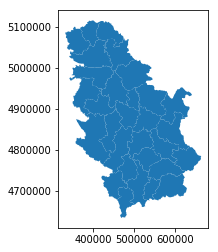

In [5]:
srbmapa_df.plot()
plt.show()

Али, ми не желимо да цртамо само Србију и њене округе, већ бисмо волели да одређене округе обојимо у складу са подацима по окрузима, за то учитавамо ретходно припремљене податке о образовању по окрузима:

In [6]:
prosvetni_podaci_okruzi = pd.read_csv('data/srednjoskolci data/MPNTR_podaci_po_okruzima.csv',encoding='UTF-16')
prosvetni_podaci_okruzi.head(2)

,Okrug,Broj učenika,Broj devojčica,Broj odeljenja,Broj nastavnika - bez zamena,Ukupna norma nastavnikaa - bez zamena,Broj skola,Područje rada,Obrazovni profil,Ukupno gimnazijalaca
0,Borski upravni okrug,3281,1542,140,432,290.9780,10,9,52,770
1,Braničevski upravni okrug,4953,2452,196,525,393.9538,10,9,52,1137


Како се колона о окрузима разликује у ове две табеле map_df и df, морамо их усагласити пре него што их спојимо. Примећујемо да су називи колона другачији - у једном случају Okrug а у другом okrug_imel, али и садржај - у само једној од табела називи округа су исписани свим великим словима.

In [7]:
prosvetni_podaci_okruzi['Okrug'] = [text.upper() for text in list(prosvetni_podaci_okruzi['Okrug'])]
prosvetni_podaci_okruzi = prosvetni_podaci_okruzi.rename(columns={'Okrug':'okrug_imel'})
prosvetni_podaci_okruzi.head(2)

,okrug_imel,Broj učenika,Broj devojčica,Broj odeljenja,Broj nastavnika - bez zamena,Ukupna norma nastavnikaa - bez zamena,Broj skola,Područje rada,Obrazovni profil,Ukupno gimnazijalaca
0,BORSKI UPRAVNI OKRUG,3281,1542,140,432,290.9780,10,9,52,770
1,BRANIČEVSKI UPRAVNI OKRUG,4953,2452,196,525,393.9538,10,9,52,1137


Када смо усагласили табеле, можемо наставити и спојити их по колони која је заједничка, сада се она зове 'okrug_imel':

In [8]:
srbmapa_podaci = pd.merge(srbmapa_df,prosvetni_podaci_okruzi,on='okrug_imel')
srbmapa_podaci.head(2)

,okrug_sifra,okrug_ime,okrug_imel,rap_sifra,rap_ime,rap_imel,wkt,geometry,Broj učenika,Broj devojčica,Broj odeljenja,Broj nastavnika - bez zamena,Ukupna norma nastavnikaa - bez zamena,Broj skola,Područje rada,Obrazovni profil,Ukupno gimnazijalaca
0,2,СРЕДЊОБАНАТСКИ УПРАВНИ ОКРУГ,SREDNJOBANATSKI UPRAVNI OKRUG,8,АП ВОЈВОДИНА,AP VOJVODINA,"POLYGON((475315.080400002 5071355.0674,475388....","POLYGON ((475315.080 5071355.067, 475388.974 5...",5572,2771,223,696,475.3835,10,13,55,1339
1,14,БОРСКИ УПРАВНИ ОКРУГ,BORSKI UPRAVNI OKRUG,7,ЦЕНТРАЛНА СРБИЈА,CENTRALNA SRBIJA,"POLYGON((616553.5289 4952159.0595,616885.82040...","POLYGON ((616553.529 4952159.060, 616885.820 4...",3281,1542,140,432,290.9780,10,9,52,770


Нова табела сада за сваки округ поред геометријског облика садржи и информације о образовању. Додаћемо још пар колона које можемо визуализовати:

In [9]:
srbmapa_podaci['Procenat gimnazijalaca'] = round(100*srbmapa_podaci['Ukupno gimnazijalaca']/srbmapa_podaci['Broj učenika'],2)
srbmapa_podaci['Broj ucenika po nastavniku'] = srbmapa_podaci['Broj učenika']/srbmapa_podaci['Broj nastavnika - bez zamena']
srbmapa_podaci['Procenat devojcica'] = round(100*srbmapa_podaci['Broj devojčica']/srbmapa_podaci['Broj učenika'],2)

Сада број образовних профила доступних по округу можемо нацртати доста једноставно:

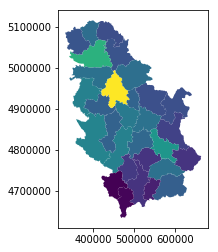

In [10]:
srbmapa_podaci.plot(column='Obrazovni profil')
plt.show()

Али за корисну и читљиву визуализацију ово није довољно - није јасно шта су различите боје и колика разлика у бројевима води разлици од жуте боје до тамно плаве, такође, уз мапу нам нису потребне х и у оса, али би наслов могао бити од користи, то ћемо урадити у наредним редовима:

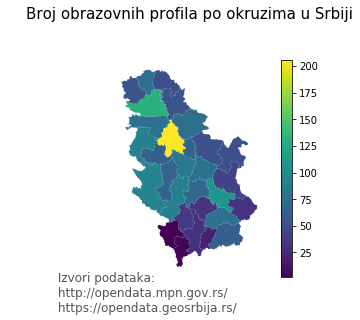

In [11]:
srbmapa_podaci.plot(column='Obrazovni profil', legend=True)
plt.axis('off')
plt.title('Broj obrazovnih profila po okruzima u Srbiji\n\n', fontdict={'fontsize': '15', 'fontweight': '3'})
plt.annotate(' Izvori podataka: \n http://opendata.mpn.gov.rs/\n https://opendata.geosrbija.rs/',xy=(0.15, 0.15),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555');

Можемо и да променимо величину слике, и дефинишемо неку другу палету боја, за избор доступних палета видети нпр. https://scipy-cookbook.readthedocs.io/items/Matplotlib_Show_colormaps.html

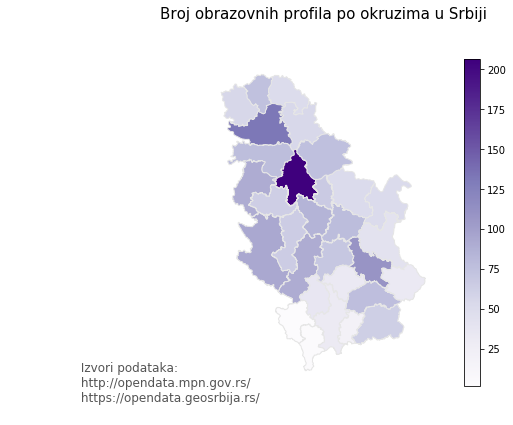

In [12]:
fig, ax = plt.subplots(1,figsize=(10,6))
srbmapa_podaci.plot(column='Obrazovni profil', ax=ax, legend=True, cmap='Purples', linewidth=1, edgecolor='0.9')
ax.axis('off')
ax.set_title('Broj obrazovnih profila po okruzima u Srbiji\n\n', fontdict={'fontsize': '15', 'fontweight': '3'})
ax.annotate(' Izvori podataka: \n http://opendata.mpn.gov.rs/\n https://opendata.geosrbija.rs/',xy=(0.15, 0.15),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555');

Претходних пар линија кода можемо спаковати у функцију, тако да само навођењем варијабле коју хоћемо да унесемо на мапу можемо да истражимо како претходни подаци изгледају:

In [13]:
def nacrtajmapu(podaci, variable):
    fig, ax = plt.subplots(1,figsize=(10,6))
    podaci.plot(column=variable, ax=ax, legend=True, cmap='Purples', linewidth=1, edgecolor='0.9')
    ax.axis('off')
    ax.set_title(variable+' u Srbiji', fontdict={'fontsize': '15', 'fontweight': '3'})
    ax.annotate(' Izvori podataka: \n http://opendata.mpn.gov.rs/\n https://opendata.geosrbija.rs/',xy=(0.15, 0.15),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555');

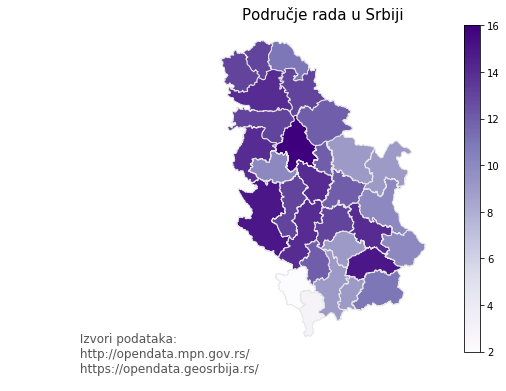

In [14]:
nacrtajmapu(srbmapa_podaci, 'Područje rada')

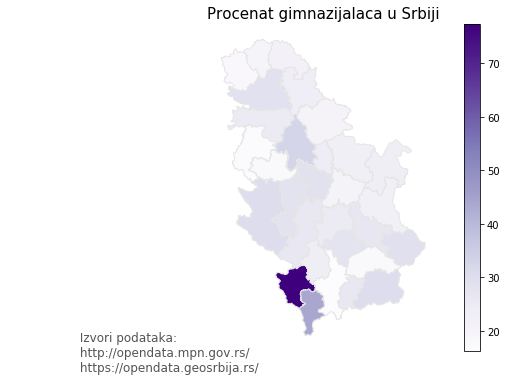

In [15]:
nacrtajmapu(srbmapa_podaci, 'Procenat gimnazijalaca')

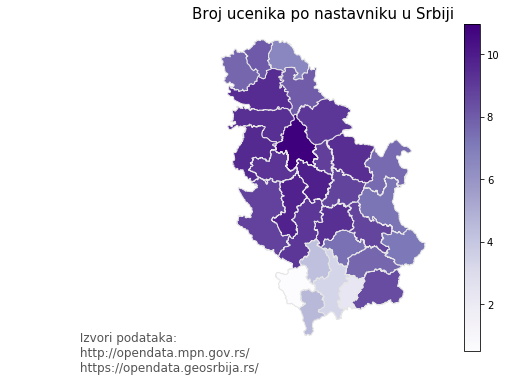

In [16]:
nacrtajmapu(srbmapa_podaci, 'Broj ucenika po nastavniku')

## Задаци

1. Израчунајте проценат девојчица у средњим школама за сваки округ и визуализујте податке на мапи.

2. Израчунајте просечан број ђака по одељењу у сваком округу и представите те податке на мапи и варирајте палету боја за најјасније представљање резултата.